<a href="https://colab.research.google.com/github/urvashiramdasani/ML-DL-Python/blob/master/DL/18BCE247_DL3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Urvashi Ramdasani

Division : EL3

Aim : 

In [27]:
# Load the libraries

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
import keras
from sklearn import metrics
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns

In [11]:
# Load the data

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (60000, 28, 28)
y_train shape :  (60000,)
X_test shape :  (10000, 28, 28)
y_test shape :  (10000,)


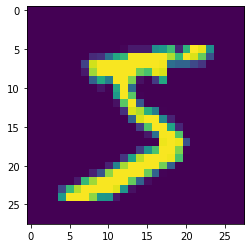

In [13]:
plt.imshow(X_train[0])

In [14]:
# Reshaping data

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') # 1 in the extra dimension signifies the channel
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [15]:
# Normalizing data between 0 and 1

X_train /= 255
X_test /= 255

One Hot Encoding - It is used to represent categories into binary columns. The integer encoded variable is removed and a new binary variable is added for each unique integer value. Results in Good performance.

In [16]:
y_train = np_utils.to_categorical(y_train)
y_test_tmp = y_test
y_test = np_utils.to_categorical(y_test)

In [35]:
# Define the model

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [36]:
# Compile the model

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
________________________________________________

In [37]:
# Train the model

history = model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2873 - accuracy: 0.9123
Epoch 2/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0518 - accuracy: 0.9839
Epoch 3/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0315 - accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0246 - accuracy: 0.9922
Epoch 5/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0170 - accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 7/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0132 - accuracy: 0.9955
Epoch 8/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0092 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0085 - accuracy: 0.9969
Epoch 10/10
1875/1875 [==============================] - 33s 17m

In [38]:
# Evaluate the model

loss_and_metrics = model.evaluate(X_test, y_test, batch_size = 32)
print("Loss on test data : ", loss_and_metrics[0])
print("Accuracy on test data : ", loss_and_metrics[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0442 - accuracy: 0.9907
Loss on test data :  0.04416174441576004
Accuracy on test data :  0.9907000064849854


In [39]:
# Make predictions

classes = model.predict(X_test, batch_size = 32)
y_predicted = []
for i in range(len(classes)):
  y_predicted.append(np.argmax(classes[i]))
print(y_predicted)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 5, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [40]:
# Classification Report

print('Classification Report : ')
print(metrics.classification_report(y_true = y_test_tmp, y_pred = y_predicted))

Classification Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



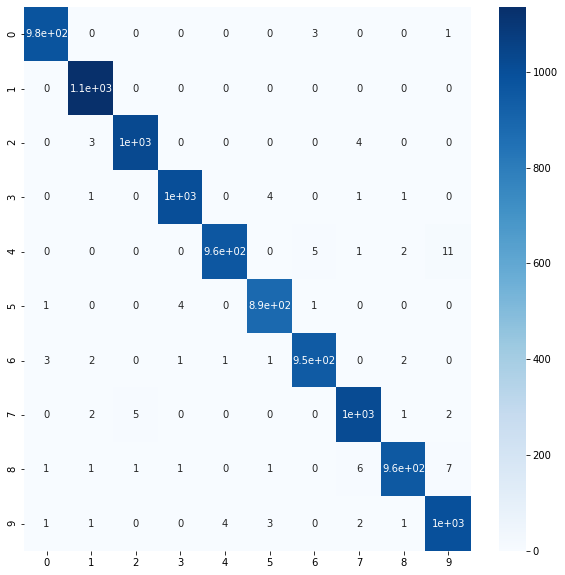

In [41]:
# Confusion matrix

fig, ax = plt.subplots(figsize=(10, 10))
cm = metrics.confusion_matrix(y_true = y_test_tmp, y_pred = y_predicted)
sns.heatmap(cm, annot = True, cmap = 'Blues', ax = ax)

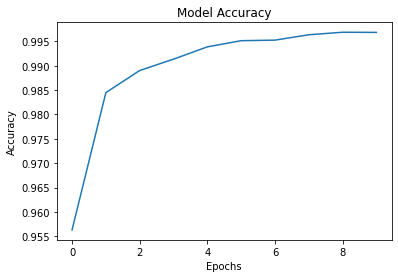

In [44]:
# Accuracy Plot

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

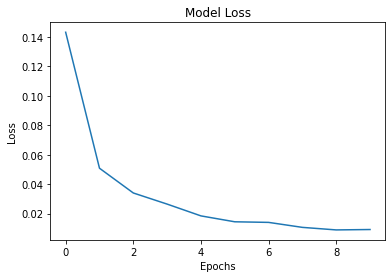

In [45]:
# Loss Plot

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()